In [1]:
!pip install keras-bert

  Created wheel for keras-bert: filename=keras_bert-0.78.0-cp36-none-any.whl size=37883 sha256=8e6808ec95558f57c7e9f9c535fdc3c8b95c096a311fb6d286a58ad3de51080b
  Stored in directory: /root/.cache/pip/wheels/9f/2a/a3/a4741e16520a3d651bf895e5fba34d886a993efdbb303ffc11
  Created wheel for keras-transformer: filename=keras_transformer-0.30.0-cp36-none-any.whl size=13388 sha256=02a532f0b1679333574a3069ed21c3e2178b287cda4e695ecdf4acac47556f97
  Stored in directory: /root/.cache/pip/wheels/b5/06/e3/172763eea3a0b3046c91a75ec778c54e55f96ee0efdb79c044
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp36-none-any.whl size=7553 sha256=0fd977f8484a892c062a9707da2cf1f90daf954ffd2fb598340d4272aaf4d9b6
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.22.0-cp36-none-any.whl size=15371 sha256=f97049f6ba0e9c030bd916ebca2c424ae902bc258ccb19a05698ba11edfa62a6
  Stor

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models, layers
from keras.preprocessing import text, sequence
from keras.datasets import imdb
import keras_bert

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 1s 0us/step


In [7]:
maxlength_cal = []
for i in x_train:
  max_length = len(i)
  maxlength_cal.append(max_length)
  
  
print(np.max(np.asarray(maxlength_cal)))
  

2494


## Keras Bert with toy example

In [0]:
import keras 
from keras_bert import get_base_dict, get_model, compile_model, gen_batch_inputs

In [0]:
sentence_pairs = [
    [['all', 'work', 'and', 'no', 'play'], ['makes', 'jack', 'a', 'dull', 'boy']],
    [['from', 'the', 'day', 'forth'], ['my', 'arm', 'changed']],
    [['and', 'a', 'voice', 'echoed'], ['power', 'give', 'me', 'more', 'power']],
]

In [11]:
sentence_pairs

[[['all', 'work', 'and', 'no', 'play'], ['makes', 'jack', 'a', 'dull', 'boy']],
 [['from', 'the', 'day', 'forth'], ['my', 'arm', 'changed']],
 [['and', 'a', 'voice', 'echoed'], ['power', 'give', 'me', 'more', 'power']]]

In [0]:
token_dict = {
    '[CLS]': 0,
    '[SEP]': 1,
    'un': 2,
    '##aff': 3,
    '##able': 4,
    '[UNK]': 5,
}

In [0]:
tokenizer = keras_bert.Tokenizer(token_dict)

In [0]:
indices, segments = tokenizer.encode('unaffable')

In [19]:
print(indices)
print(segments)

[0, 2, 3, 4, 1]
[0, 0, 0, 0, 0]


In [0]:
token_dict = get_base_dict()  # A dict that contains some special tokens
for pairs in sentence_pairs:
    for token in pairs[0] + pairs[1]:
        if token not in token_dict:
            token_dict[token] = len(token_dict)
token_list = list(token_dict.keys())  # Used for selecting a random word

In [44]:
token_dict

{'': 0,
 '[CLS]': 2,
 '[MASK]': 4,
 '[SEP]': 3,
 '[UNK]': 1,
 'a': 12,
 'all': 5,
 'and': 7,
 'arm': 20,
 'boy': 14,
 'changed': 21,
 'day': 17,
 'dull': 13,
 'echoed': 23,
 'forth': 18,
 'from': 15,
 'give': 25,
 'jack': 11,
 'makes': 10,
 'me': 26,
 'more': 27,
 'my': 19,
 'no': 8,
 'play': 9,
 'power': 24,
 'the': 16,
 'voice': 22,
 'work': 6}

In [0]:
token_list = list(token_dict.keys())

In [0]:
model = get_model(
    token_num=len(token_dict),
    head_num=5,
    transformer_num=12,
    embed_dim=25,
    feed_forward_dim=100,
    seq_len=20,
    pos_num=20,
    dropout_rate=0.05,
)

In [47]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 20)           0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 20)           0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 20, 25), (28 700         Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 20, 25)       50          Input-Segment[0][0]              
____________________________________________________________________________________________

In [0]:
from keras.utils import plot_model

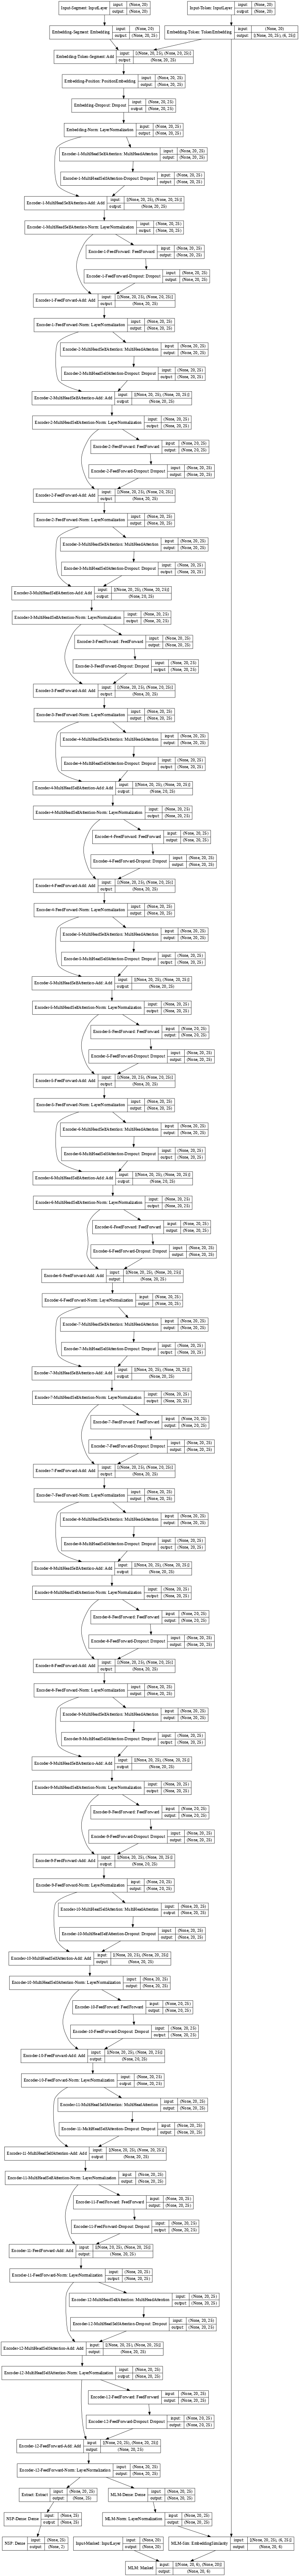

In [28]:
plot_model(model, 'model.png', show_shapes=True, dpi=50)

In [0]:
compile_model(model)

In [0]:
def _generator():
    while True:
        yield gen_batch_inputs(
            sentence_pairs,
            token_dict,
            token_list,
            seq_len=20,
            mask_rate=0.3,
            swap_sentence_rate=1.0,
        )

In [50]:
model.fit_generator(
    generator=_generator(),
    steps_per_epoch=1000,
    epochs=100,
    validation_data=_generator(),
    validation_steps=100,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    ],
)

Epoch 1/100
1000/1000 [==============================] - 141s 141ms/step - loss: 4.0832 - MLM_loss: 3.3340 - NSP_loss: 0.7491 - val_loss: 3.9655 - val_MLM_loss: 3.3269 - val_NSP_loss: 0.6386
Epoch 2/100
1000/1000 [==============================] - 114s 114ms/step - loss: 3.9134 - MLM_loss: 3.3049 - NSP_loss: 0.6085 - val_loss: 3.8120 - val_MLM_loss: 3.2704 - val_NSP_loss: 0.5417
Epoch 3/100
1000/1000 [==============================] - 113s 113ms/step - loss: 3.6727 - MLM_loss: 3.2744 - NSP_loss: 0.3983 - val_loss: 3.4550 - val_MLM_loss: 3.2614 - val_NSP_loss: 0.1936
Epoch 4/100
1000/1000 [==============================] - 113s 113ms/step - loss: 3.3970 - MLM_loss: 3.2410 - NSP_loss: 0.1561 - val_loss: 3.2866 - val_MLM_loss: 3.2174 - val_NSP_loss: 0.0692
Epoch 5/100
1000/1000 [==============================] - 113s 113ms/step - loss: 3.2558 - MLM_loss: 3.1787 - NSP_loss: 0.0771 - val_loss: 3.1523 - val_MLM_loss: 3.1232 - val_NSP_loss: 0.0291
Epoch 6/100
1000/1000 [======================